In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Keras fashion mnist dataset을 다운로드
* 5만개의 학습용, 1만개의 테스트용 grayscale image array를 다운로드

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # grayscale 이미지임 (60000, 28, 28) => 6만개의 28 바이 28 이미지
# image size는 28x28의 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape) 
print("test dataset shape:", test_images.shape, test_labels.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

4422102/4422102 [==============================] - 1s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


### MNIST image array 시각화

Text(0.5, 1.0, '9')

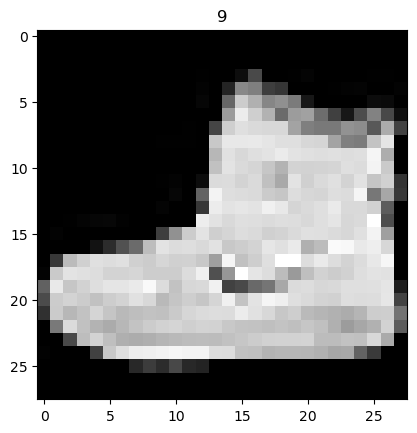

In [3]:
import matplotlib.pyplot as plt
# 브라우저에서 그래프같은 그림을 볼 수 있게 함
%matplotlib inline 

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [4]:
train_images[0, :, :], train_labels[0] # 첫번쨰 이미지만 보기, [0, :, :] => 0번째 인덱스의 사진의 전체 행과 열

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

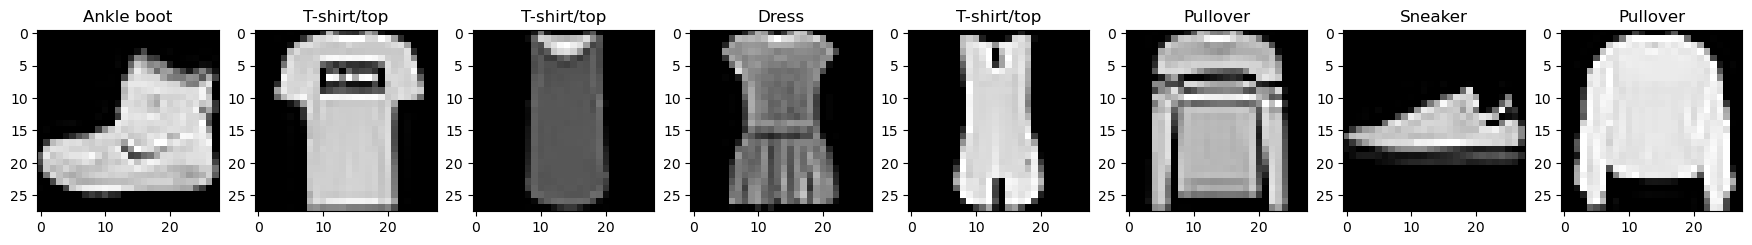

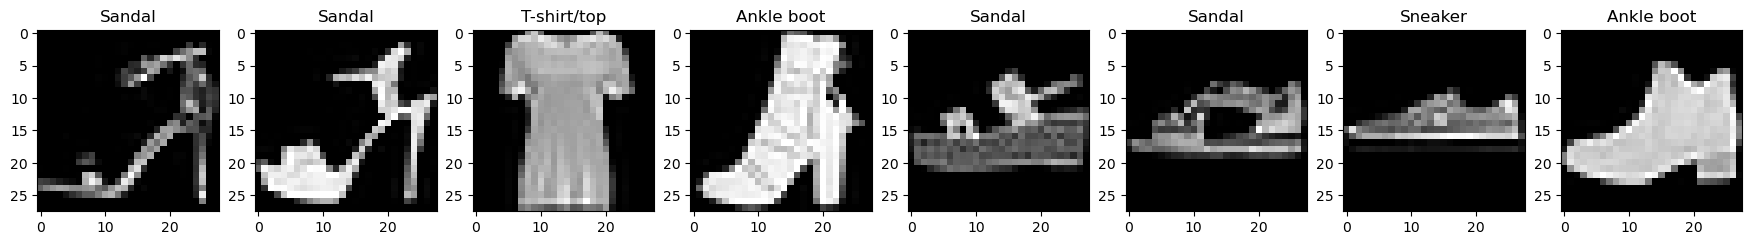

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### 데이터 전처리 수행. 
* 0 ~ 255 사이의 픽셀값을 0 ~ 1 사이 값으로 변환. 
* array type은 float 32

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32) # 텐서(배열) 속의 데이터는 원래 다 float32 이다.
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)


train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [7]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Dense Layer를 기반으로 모델을 생성

In [8]:
INPUT_SIZE = 28 # fashion_mnist 데이터의 모든 이미지들의 크기는 28 x 28 이다.

In [9]:
# Dense Layer는 그냥 일자로 뉴런이 나열된 레이어인데 슬라이딩하면서 컨볼루션 연산을 안하므로 이미지 속 물체가 가운데에 있어야만 성능이 잘 나온다.
from tensorflow.keras.layers import Dense, Flatten
# Sequential 하게(feed forward 하게) 레이어들을 배치함
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)), # Dense layer에 들어가기 전에 input image(features)를 일차원 배열로 쭉 늘려야한다. 28 * 28 == 784
    Dense(100, activation='relu'), # 100개의 weight 존재, weighted sum 연산 수행 후 activation function 적용
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary() # 첫번째 dense layer의 param은 784 * 100 + 100(bias) == 78500이 된다.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### 모델의 Loss와 Optimizer 설정하고 학습 수행
* loss는 categorical_crossentropy로, optimizer는 Adam으로 설정
* categorical crossentropy를 위해서 Lable을 OHE(One Hot Encoding) 로 변경

In [10]:
from tensorflow.keras.optimizers import Adam # Gradient와 learning rate를 동시에 보정하는 옵티마이저
from tensorflow.keras.losses import CategoricalCrossentropy # 회귀는 손실함수로 MSE사용 분류는 손실함수로 Cross entropy사용, but 이진분류는 binary Cross Entropy, 멀티분류는 Categorycal Cross Entropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy']) # 문자열을 넣어도 되고 import한 객체를 넣어도 된다. 

In [11]:
# CategoricalCrossentropy를 loss 함수로 이용하려면 반드시 One Hot Encoding(수많은 데이터들의 label을 0 또는 1로 표현하는 기법)을 해야한다.
from tensorflow.keras.utils import to_categorical

# One Hot Encoding 기법 적용
train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape) # label이 1차원이었다가 2차원으로 변경됨(10개의 열에 0인지 1인지의 값이 들어감)

(60000, 10) (10000, 10)


In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 10s 3ms/step - loss: 0.5170 - accuracy: 0.8185
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3823 - accuracy: 0.8626
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3415 - accuracy: 0.8755
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3181 - accuracy: 0.8847
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3013 - accuracy: 0.8880
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2880 - accuracy: 0.8929
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2766 - accuracy: 0.8979
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2651 - accuracy: 0.9010
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2558 - accuracy: 0.9046
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.24

In [14]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.5169916152954102, 0.3823472857475281, 0.3414909839630127, 0.3180552124977112, 0.3013206124305725, 0.2879623770713806, 0.27663296461105347, 0.2651088535785675, 0.2557678818702698, 0.2472614198923111, 0.24000951647758484, 0.23426124453544617, 0.224094957113266, 0.22026871144771576, 0.2133663147687912, 0.21113596856594086, 0.2035430669784546, 0.19993478059768677, 0.1942576915025711, 0.18915009498596191]
[0.8184666633605957, 0.8626499772071838, 0.8754666447639465, 0.8847333192825317, 0.8879833221435547, 0.8928833603858948, 0.8978833556175232, 0.9010166525840759, 0.9045833349227905, 0.9074500203132629, 0.9109166860580444, 0.9114999771118164, 0.9163500070571899, 0.9159166812896729, 0.9196666479110718, 0.9206333160400391, 0.9232166409492493, 0.9246166944503784, 0.9265833497047424, 0.9288833141326904]


### 테스트 데이터를 기반으로 Label 값 예측
* model.predict()를 이용하여 label값 예측
* predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야함. 
* fit() 시 3차원(28x28 2차원 array가 여러개 존재) array 입력 했으므로 predict()도 동일한 3차원 데이터 입력
* 특히 한건만 predict() 할때도 3차원 데이터여야 함. 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)
print(pred_proba[0]) # label이 0부터 9까지 존재하는데 각 확률이 나옴

313/313 [==============================] - 1s 1ms/step
(10000, 10)
[2.1373140e-12 8.3335337e-14 1.2233712e-12 3.8156159e-11 2.0668493e-14
 3.0227395e-07 3.2902968e-14 3.5614945e-04 7.0302236e-11 9.9964356e-01]


In [17]:
print(np.argmax(pred_proba[0])) # 가장 확률이 높은 label(인덱스)을 출력

9


In [18]:
test_images.shape

(10000, 28, 28)

In [19]:
test_images[0].shape

(28, 28)

In [20]:
np.expand_dims(test_images[0], axis=0).shape # 2차원에서 3차원으로 변경, 우리가 넣는 input 데이터는 3차원이지만 모델은 각각의 데이터를 2차원으로 받아들이고 알아서 잘 처리한다.
# axis = 0 일경우, (1, 28, 28)
# axis = 1 일경우, (28, 1, 28)
# axis = 2(-1) 일경우, (28, 28, 1)

(1, 28, 28)

In [21]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba)) # squeeze를 통해 3차원을 다시 2차원으로 변경([[ 이면 2차원, [[[ 이면 3차원)
print('predicted class value:', pred)

1/1 [==============================] - 0s 23ms/step
softmax output: [[2.1373101e-12 8.3335181e-14 1.2233712e-12 3.8156159e-11 2.0668454e-14
  3.0227395e-07 3.2903093e-14 3.5614931e-04 7.0302507e-11 9.9964356e-01]]
predicted class value: 9


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0], 'predicted class value:', pred)

target class value: 9.0 predicted class value: 9


### 테스트 데이터 세트로 모델 성능 검증

In [23]:
# 학습을 train데이터와 train 데이터의 label의 one hot encoding값으로 했으므로 테스트 데이터의 label도 one hot encoding 처리된 값이어야한다.
# 학습을 train 데이터로만 수행하였으므로 train 데이터에 대한 예측 성능만 잘 나올 수 있고, 테스트 데이터에 대한 예측 성능은 떨어질 수 있다.
model.evaluate(test_images, test_oh_labels, batch_size=64) 

157/157 [==============================] - 1s 2ms/step - loss: 0.3779 - accuracy: 0.8817


[0.3779013156890869, 0.8816999793052673]

### 검증 데이터 세트를 이용하여 학습 수행. 
* 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
* fit()을 수행하면 iteration을 반복하기 때문에 중간에 하이퍼파라미터 변경(예: Learning Rate)등의 작업이 어려움. 
* fit() iteration시 여러 작업을 하기 위해 Callback 객체를 가짐. 
* 검증 데이터 세트를 fit() 시 적용하여 과적합이나 더이상 검증 데이터 성능이 좋아 지지 않을 때 Callback을 사용하여 Learning Rate 보정 작업등을 수행 가능
* 검증 데이터 셋을 활용하여 학습 수행 => overfitting나면 하이퍼 파라미터 변경

In [24]:
import numpy as np 
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021) # 학습 데이터에서 15%는 validation(검증) 데이터가 된다.
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


### 검증 데이터 세트를 적용하여 학습 수행. 

In [26]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), 
                    epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 3s 4ms/step - loss: 0.6082 - accuracy: 0.7917 - val_loss: 0.4613 - val_accuracy: 0.8377
Epoch 2/20
399/399 [==============================] - 1s 4ms/step - loss: 0.4196 - accuracy: 0.8539 - val_loss: 0.4206 - val_accuracy: 0.8499
Epoch 3/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3778 - accuracy: 0.8667 - val_loss: 0.3767 - val_accuracy: 0.8661
Epoch 4/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3520 - accuracy: 0.8746 - val_loss: 0.4022 - val_accuracy: 0.8556
Epoch 5/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3332 - accuracy: 0.8804 - val_loss: 0.3857 - val_accuracy: 0.8590
Epoch 6/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3147 - accuracy: 0.8871 - val_loss: 0.3547 - val_accuracy: 0.8701
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3061 - accuracy: 0.8882 - val_loss: 0.3383 - val_accuracy: 0.8792
Epoch 

In [28]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.6081832051277161, 0.4196246862411499, 0.37781456112861633, 0.351986825466156, 0.33319076895713806, 0.31472310423851013, 0.3060941994190216, 0.29090601205825806, 0.28045573830604553, 0.26945096254348755, 0.26318666338920593, 0.2556554079055786, 0.2525579333305359, 0.24484625458717346, 0.2370585799217224, 0.22819200158119202, 0.2260463982820511, 0.21837486326694489, 0.2144792377948761, 0.21037794649600983]
[0.7917255163192749, 0.8539019823074341, 0.8667058944702148, 0.8745882511138916, 0.8803529143333435, 0.8870980143547058, 0.8882352709770203, 0.8934509754180908, 0.8968039155006409, 0.9004117846488953, 0.902470588684082, 0.9059804081916809, 0.9076274633407593, 0.9095882177352905, 0.9127451181411743, 0.9159803986549377, 0.9172353148460388, 0.9188627600669861, 0.9213725328445435, 0.9219019412994385]
[0.4612518846988678, 0.420558899641037, 0.3767220377922058, 0.40218064188957214, 0.3856675624847412, 0.35471898317337036, 0.3383200168609619, 0.3373146653175354, 0.3339180648326874, 0.33041

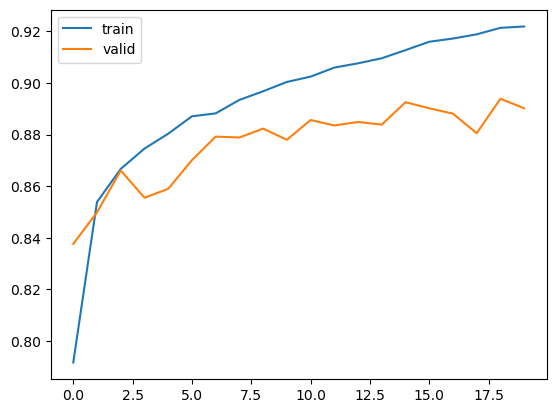

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

### Functional API

일반적으로 Sequential을 이용하면 쉽게 모델을 만들 수 있음(이것은 간단한 모델을 만들때만 유용, 응용성 없음)
하지만 kears의 핵심은 Functional API이다.

In [30]:
# keras의 Sequential을 이용하여 모델 생성(2가지 방법) 

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model1 = Sequential() # keras 초창기의 방식
model1.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)        

In [31]:
# Keras의 Functional API 이용해서 모델 만들기

from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor) # Functional API의 특징 => 객체()(입력 데이터)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 30)                3030      
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### Custom한 Dense Layer 생성하기

In [32]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):
    # CustomDense 객체 생성시 입력되는 초기화 parameter 처리
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units), # input_shape[-1]은 inputs의 열의 개수를 의미함
            initializer="random_normal", # 랜덤한 값으로 초기화
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), # 뉴런 수만큼의 열을 가지는 bias 배열 생성
            initializer="random_normal", # 랜덤한 값으로 초기화
            trainable=True
        )
        
    # CustomDense 객체에 callable로 입력된 입력 데이터 처리. 
    def call(self, inputs): # input 데이터 처리
        return tf.matmul(inputs, self.w) + self.b # w는 weight, b는 bias, tf.matmul은 행렬간의 곱셈

# input 값을 4개의 원소를 가지는 1차원으로 생성. 
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
outputs = CustomDense(10)(inputs) # 객체(생성자)(이전 연산의 출력 데이터 값), units=10, call 함수 호출 됨

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense (CustomDense)  (None, 10)                50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


### Functional API는 객체 생성 부분과 Callable 인자 입력(이전에 수행했던 결과를 입력데이터로 넣음) 부분을 별도로 수행해도 무방. 

In [33]:
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
my_layer = CustomDense(10)
outputs = my_layer(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_1 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


### Sequential Model 생성은 단지 Functional API Layer들을 iteration 하면서 연결한 것을 model로 만든 것임

In [34]:
from tensorflow.keras.models import Sequential

model = Sequential([
    Input((4,)), # summary()시 input이 출력이 안될 것임
    CustomDense(10),
    CustomDense(8), 
    tf.keras.layers.ReLU() # Activation Function
    ])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_dense_2 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_3 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu (ReLU)                (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


### Sequential Model을 Functional 객체를 For loop 반복 호출하여 작성.

In [35]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

for index, layer in enumerate(layers_list):
        print(index, layer)

0 KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
1 <__main__.CustomDense object at 0x7cf2480de6b0>
2 <__main__.CustomDense object at 0x7cf2480dc970>
3 <keras.layers.activation.relu.ReLU object at 0x7cf2480de800>


In [36]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

inputs = None
callable_inputs = None
outputs = None
# layers_list에 있는 Functional 객체를 iteration 수행하면서 적용. 
for index, layer in enumerate(layers_list):
    # layers_list의 첫번째 인자는 Input 간주. 
    if index == 0:
        inputs = layer
        callable_inputs = layer
    # Functional 객체에 callable 인자로 callable_inputs를 입력하고 반환 결과 값을 다시 callable_inputs로 할당.     
    else: 
        callable_inputs = layer(callable_inputs) # =기호 오른쪽 layer의 call을 호출
    
outputs = callable_inputs
model = Model(inputs, outputs)
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_6 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_7 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu_2 (ReLU)              (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


### 앞에서 생성한 로직들을 함수화 
* Functional API로 모델 만들기
* pixel값 1 ~ 255를 0 ~ 1사이값 Float 32로 만들기
* One Hot Encoding Label에 적용하기
* 학습과 검증 데이터로 나누기.
* compile, 학습/예측/평가

In [37]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE)) # 2차원 (3차원 배열 입력하면 2차원으로 인식)
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    return model

In [38]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 

In [39]:
from tensorflow.keras.datasets import fashion_mnist
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [40]:
from tensorflow.keras.optimizers import Adam

# Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_16 (Dense)            (None, 30)                3030      
                                                                 
 dense_17 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 학습 수행. 
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))

Epoch 1/20
399/399 [==============================] - 3s 4ms/step - loss: 0.5909 - accuracy: 0.7958 - val_loss: 0.4488 - val_accuracy: 0.8409
Epoch 2/20
399/399 [==============================] - 1s 4ms/step - loss: 0.4150 - accuracy: 0.8562 - val_loss: 0.4031 - val_accuracy: 0.8567
Epoch 3/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3741 - accuracy: 0.8671 - val_loss: 0.3855 - val_accuracy: 0.8622
Epoch 4/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3518 - accuracy: 0.8751 - val_loss: 0.3562 - val_accuracy: 0.8731
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3308 - accuracy: 0.8804 - val_loss: 0.3545 - val_accuracy: 0.8716
Epoch 6/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3157 - accuracy: 0.8857 - val_loss: 0.3613 - val_accuracy: 0.8719
Epoch 7/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3005 - accuracy: 0.8886 - val_loss: 0.3461 - val_accuracy: 0.8748
Epoch 

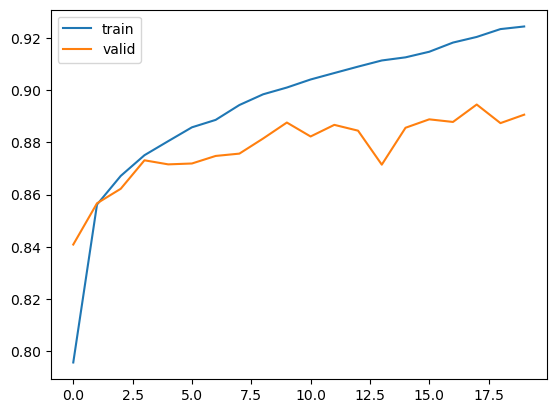

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [43]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.8831


[0.3404899835586548, 0.8830999732017517]

### keras Callback (model.fit() 수행시 (모델 학습시) 하이퍼 파라미터 변경) => callback을 등록해놓으면 model.fit() 수행시 호출 된다. (주로 최적의 learning rate를 컨트롤)

call은 함수를 호출하는것 callback은 특정 코드의 수행이 끝나지 않아도 실행될 수 있도록 하는 비동기 처리 방식이다.

#### ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
* 2주동안 모델을 학습시키는데 중간에 컴퓨터가 꺼지면 다시학습해야한다. 그래서 백업이 필요한데 이때 이 callback(ModelCheckpoint)가 이용된다. 
* 특정 조건에 맞춰서 모델을 파일로 저장
* filepath: filepath는 (on_epoch_end에서 전달되는) epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음.
예를 들어 filepath가 weights.{epoch:02d}-{val_loss:.2f}.hdf5라면, 파일 이름에 세대 번호와 검증 손실을 넣어 모델의 체크포인트가 저장 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부 (하나의 모델의 크기가 크면 모든 모델을 저장하는데 용량이 많이 필요)
* save_weights_only: Weights만 저장할 지 여부 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추. 

In [44]:
!pwd # 현재 디렉터리 경로 출력 (캐글 노트북에서 리눅스 명령어 사용하려면 앞에 ! 있어야함)

/kaggle/working


In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=3, verbose=1) # period 1이면 매 epoch 시마다 모델저장 
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb])

Epoch 1/10
399/399 [==============================] - 3s 4ms/step - loss: 0.5931 - accuracy: 0.8005 - val_loss: 0.4591 - val_accuracy: 0.8332
Epoch 2/10
399/399 [==============================] - 2s 4ms/step - loss: 0.4129 - accuracy: 0.8555 - val_loss: 0.4001 - val_accuracy: 0.8593
Epoch 3/10
390/399 [============================>.] - ETA: 0s - loss: 0.3732 - accuracy: 0.8681
Epoch 3: val_loss improved from inf to 0.38383, saving model to /kaggle/working/weights.03-0.38.hdf5
399/399 [==============================] - 1s 4ms/step - loss: 0.3734 - accuracy: 0.8683 - val_loss: 0.3838 - val_accuracy: 0.8639
Epoch 4/10
399/399 [==============================] - 2s 4ms/step - loss: 0.3470 - accuracy: 0.8756 - val_loss: 0.3607 - val_accuracy: 0.8717
Epoch 5/10
399/399 [==============================] - 1s 4ms/step - loss: 0.3293 - accuracy: 0.8822 - val_loss: 0.3463 - val_accuracy: 0.8767
Epoch 6/10
386/399 [============================>.] - ETA: 0s - loss: 0.3124 - accuracy: 0.8873
Epoch 6:

In [46]:
!ls -lia
#!rm -rf weight*
#!ls -lia


total 1024
   131074 drwxr-xr-x 3 root root   4096 Jul 25 08:42 .
268743683 drwxr-xr-x 5 root root   4096 Jul 25 08:38 ..
   131080 drwxr-xr-x 2 root root   4096 Jul 25 08:38 .virtual_documents
   131077 ---------- 1 root root    263 Jul 25 08:38 __notebook_source__.ipynb
   131081 -rw-r--r-- 1 root root 344040 Jul 25 08:42 weights.03-0.38.hdf5
   131082 -rw-r--r-- 1 root root 344040 Jul 25 08:42 weights.06-0.36.hdf5
   131083 -rw-r--r-- 1 root root 344040 Jul 25 08:42 weights.09-0.32.hdf5


#### ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
* 특정 epochs 횟수동안 성능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* factor: 학습 속도를 줄일 인수. new_lr = lr * factor 
* patience: Learing Rate를 줄이기 전에 monitor할 epochs 횟수. (Patience 수가 지난 이후에도 LR이 줄어들지 않으면 LR 감소 시작)
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [47]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr_cb])

Epoch 1/30
399/399 [==============================] - 3s 4ms/step - loss: 0.5942 - accuracy: 0.7963 - val_loss: 0.4594 - val_accuracy: 0.8371 - lr: 0.0010
Epoch 2/30
399/399 [==============================] - 2s 4ms/step - loss: 0.4088 - accuracy: 0.8569 - val_loss: 0.3987 - val_accuracy: 0.8597 - lr: 0.0010
Epoch 3/30
399/399 [==============================] - 2s 5ms/step - loss: 0.3702 - accuracy: 0.8690 - val_loss: 0.3815 - val_accuracy: 0.8629 - lr: 0.0010
Epoch 4/30
399/399 [==============================] - 1s 4ms/step - loss: 0.3462 - accuracy: 0.8757 - val_loss: 0.3891 - val_accuracy: 0.8620 - lr: 0.0010
Epoch 5/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3262 - accuracy: 0.8819 - val_loss: 0.3568 - val_accuracy: 0.8716 - lr: 0.0010
Epoch 6/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3116 - accuracy: 0.8872 - val_loss: 0.3649 - val_accuracy: 0.8666 - lr: 0.0010
Epoch 7/30
399/399 [==============================] - 1s 4ms/step - lo

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
* 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* patience: Early Stopping 적용 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely_cb])

Epoch 1/30
399/399 [==============================] - 3s 4ms/step - loss: 0.6062 - accuracy: 0.7927 - val_loss: 0.4494 - val_accuracy: 0.8422
Epoch 2/30
399/399 [==============================] - 2s 4ms/step - loss: 0.4155 - accuracy: 0.8530 - val_loss: 0.4551 - val_accuracy: 0.8374
Epoch 3/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3734 - accuracy: 0.8681 - val_loss: 0.3770 - val_accuracy: 0.8609
Epoch 4/30
399/399 [==============================] - 1s 4ms/step - loss: 0.3451 - accuracy: 0.8763 - val_loss: 0.3693 - val_accuracy: 0.8624
Epoch 5/30
399/399 [==============================] - 1s 4ms/step - loss: 0.3263 - accuracy: 0.8832 - val_loss: 0.3644 - val_accuracy: 0.8668
Epoch 6/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3132 - accuracy: 0.8869 - val_loss: 0.3349 - val_accuracy: 0.8779
Epoch 7/30
399/399 [==============================] - 1s 4ms/step - loss: 0.2962 - accuracy: 0.8925 - val_loss: 0.3428 - val_accuracy: 0.8750
Epoch 

In [49]:
!rm weigh*

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=40, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
399/399 [==============================] - 3s 5ms/step - loss: 0.5959 - accuracy: 0.7959 - val_loss: 0.4515 - val_accuracy: 0.8374 - lr: 0.0010
Epoch 2/40
399/399 [==============================] - 1s 4ms/step - loss: 0.4103 - accuracy: 0.8560 - val_loss: 0.4139 - val_accuracy: 0.8506 - lr: 0.0010
Epoch 3/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3718 - accuracy: 0.8667 - val_loss: 0.3964 - val_accuracy: 0.8590 - lr: 0.0010
Epoch 4/40
399/399 [==============================] - 1s 4ms/step - loss: 0.3502 - accuracy: 0.8742 - val_loss: 0.3789 - val_accuracy: 0.8634 - lr: 0.0010
Epoch 5/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3276 - accuracy: 0.8810 - val_loss: 0.3703 - val_accuracy: 0.8689 - lr: 0.0010
Epoch 6/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3085 - accuracy: 0.8875 - val_loss: 0.3284 - val_accuracy: 0.8826 - lr: 0.0010
Epoch 7/40
399/399 [==============================] - 2s 4ms/step - lo

In [51]:
!ls -lia

total 4096
   131074 drwxr-xr-x 3 root root   4096 Jul 25 08:44 .
268743683 drwxr-xr-x 5 root root   4096 Jul 25 08:38 ..
   131080 drwxr-xr-x 2 root root   4096 Jul 25 08:38 .virtual_documents
   131077 ---------- 1 root root    263 Jul 25 08:38 __notebook_source__.ipynb
   131081 -rw-r--r-- 1 root root 344080 Jul 25 08:43 weights.01-0.45.hdf5
   131082 -rw-r--r-- 1 root root 344080 Jul 25 08:43 weights.02-0.41.hdf5
   131083 -rw-r--r-- 1 root root 344080 Jul 25 08:43 weights.03-0.40.hdf5
   131084 -rw-r--r-- 1 root root 344080 Jul 25 08:44 weights.04-0.38.hdf5
   131085 -rw-r--r-- 1 root root 344080 Jul 25 08:44 weights.05-0.37.hdf5
   131086 -rw-r--r-- 1 root root 344080 Jul 25 08:44 weights.06-0.33.hdf5
   131087 -rw-r--r-- 1 root root 344080 Jul 25 08:44 weights.07-0.33.hdf5
   131088 -rw-r--r-- 1 root root 344080 Jul 25 08:44 weights.09-0.33.hdf5
   131089 -rw-r--r-- 1 root root 344080 Jul 25 08:44 weights.10-0.31.hdf5
   131090 -rw-r--r-- 1 root root 344080 Jul 25 08:44 weights.